In [1]:
import pandas as pd
import numpy as np

# Reading data

In [24]:
df_list = [
            pd.read_csv('data/processed_data/processed_Software.csv'),
            pd.read_csv('data/processed_data/processed_Subscription_box.csv'),
            pd.read_csv('data/processed_data/processed_VGames.csv')
        ]

df_raw = pd.concat(df_list, ignore_index=True).rename(columns={'title_x':'review_title','title_y':'product_title'})
df_raw.drop_duplicates(inplace=True) # Verifiying no duplicates are included
df_raw.reset_index()
print(df_raw.shape)
df_raw.head(3)

(25539, 17)


,rating,review_title,text,images_by_user,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,main_category,product_title,average_rating,rating_number,features,images_of_product,store
0,5.0,Perfect,Awesome app works amazing<br />This is a must,0,B01N0BP507,B01N0BP507,AF4XAUOI5XPGWHCPOTORKBIJSRDA,2018-08-11 17:35:28.884,0,True,Appstore for Android,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com
1,1.0,HUH?,I don't know what this is nor how I supposedly...,0,B01N0BP507,B01N0BP507,AHU2Y2ZFQKI3V3ARFDKZA6ER4NUQ,2018-08-29 19:01:50.693,0,True,Appstore for Android,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com
2,4.0,Four Stars,works well,0,B01N0BP507,B01N0BP507,AFFH5QKBOZANHO4ZZ7OKL7JFXFUA,2017-08-31 15:43:33.485,0,True,Appstore for Android,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com


# Macro Analysis

In [25]:
# Included categories
df_raw.main_category.value_counts()

main_category
Appstore for Android    23104
SUBSCRIPTION BOXES       1867
Video Games               562
Computers                   6
Name: count, dtype: int64

In [26]:
# Missing values 
df_raw.isna().sum()

rating                0
review_title         14
text                 14
images_by_user        0
asin                  0
parent_asin           0
user_id               0
timestamp             0
helpful_vote          0
verified_purchase     0
main_category         0
product_title         9
average_rating        0
rating_number         0
features              9
images_of_product     0
store                 9
dtype: int64

In [27]:
df_raw[df_raw.product_title.isna()]

,rating,review_title,text,images_by_user,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,main_category,product_title,average_rating,rating_number,features,images_of_product,store
23270,5.0,Poor shipping,Bix was okay but would have been nice to have ...,0,B07GNV45VX,B07GNV45VX,AH2KDCK2UMAFSXASMIO2MZ7LVMDA,2018-11-07 00:45:57.653,0,True,SUBSCRIPTION BOXES,NaN,4.5,1617.0,NaN,5,NaN
23503,4.0,Amazon is an improvement,I have been a Smuggler's Bounty subscriber sin...,0,B07GNV45VX,B07GNV45VX,AHHVIGKUGL4XGGFC3JT7MGP6RTIQ,2018-11-06 21:42:35.690,3,True,SUBSCRIPTION BOXES,NaN,4.5,1617.0,NaN,5,NaN
23866,5.0,New customer,New customer ! Getting them for my Grandson ! ...,0,B07GNV45VX,B07GNV45VX,AHCENXXWF67BBI5CKH4YNMJQY3GA,2018-11-07 03:40:06.400,0,False,SUBSCRIPTION BOXES,NaN,4.5,1617.0,NaN,5,NaN
24128,4.0,Great New pop figure set!,Great New pop figure! Love that it was boba Fe...,1,B07GNV45VX,B07GNV45VX,AGXVRHLDXNI7NIFQSKRCS4OGNN3Q,2018-11-01 22:22:59.871,2,True,SUBSCRIPTION BOXES,NaN,4.5,1617.0,NaN,5,NaN
24168,1.0,Not like it used to be,Three items is not enough for the price. Poor...,0,B07GNV45VX,B07GNV45VX,AFWN5HQO74I43PYSNYZRUYQZA4SA,2018-11-13 22:57:31.153,1,False,SUBSCRIPTION BOXES,NaN,4.5,1617.0,NaN,5,NaN
24306,2.0,Not a great value,I love the Pop Movie moments figure. Everythin...,0,B07GNV45VX,B07GNV45VX,AGXUAH4JG4KJTWQFVUGXBE4IZXTQ,2018-12-18 19:45:48.256,10,True,SUBSCRIPTION BOXES,NaN,4.5,1617.0,NaN,5,NaN
24748,5.0,The exulisve items,This was very good,0,B07GNV45VX,B07GNV45VX,AHUBOI5BSS3QHHZLGX472O52V6RA,2018-11-06 00:48:24.803,0,True,SUBSCRIPTION BOXES,NaN,4.5,1617.0,NaN,5,NaN
24962,2.0,Not enough BANG for your buck!,To get started the box arrived battered and be...,0,B07GNV45VX,B07GNV45VX,AHY2OX2F244N5LDGTK7SHBJ76YZA,2018-10-31 20:43:19.990,38,True,SUBSCRIPTION BOXES,NaN,4.5,1617.0,NaN,5,NaN
24963,5.0,Great product!,Awesome!!,0,B07GNV45VX,B07GNV45VX,AELVXSF5YZUAGP4XEGMKAWFY55KQ,2018-11-06 12:46:24.443,0,True,SUBSCRIPTION BOXES,NaN,4.5,1617.0,NaN,5,NaN


After quick look at the dataframe, we will understand that the 9 missing values come from the same lines and the same product that is missing product_title, features and Store. So the 9 lines are better to be deleted.

In [28]:
# Removing lines with no product info
df_raw.drop(df_raw[df_raw.product_title.isna()].index,inplace=True)

In [29]:
# Checking null text and title reviews
df_raw[(df_raw.review_title.isna())|(df_raw.text.isna())]

,rating,review_title,text,images_by_user,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,main_category,product_title,average_rating,rating_number,features,images_of_product,store
1046,3.0,NaN,I did not interested what they have in current...,0,B00KDSGIPK,B00KDSGIPK,AFT6HMEOUBVLWUNEWTWFF5TP55HQ,2018-11-30 18:19:39.991,0,True,Appstore for Android,Pluto TV - It’s Free TV,4.2,776283.0,Watch 100+ HD channels with 24/7 free content ...,14,Pluto TV
2226,1.0,NaN,No idea what this is,0,B01N0BP507,B01N0BP507,AHAYH5DWEU37TJM5J4I6SYRGF5ZQ,2017-08-17 09:17:00.974,0,True,Appstore for Android,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com
2599,4.0,NaN,Movies,0,B00KDSGIPK,B00KDSGIPK,AFW7Q6NQ7FUBDUXTSVKQCG5VL32A,2018-12-24 20:03:59.601,0,True,Appstore for Android,Pluto TV - It’s Free TV,4.2,776283.0,Watch 100+ HD channels with 24/7 free content ...,14,Pluto TV
2980,5.0,Five Stars,NaN,1,B01N0BP507,B01N0BP507,AFIQIJU7WZSDAETDSRX3G2LQQ5BA,2017-08-11 18:35:36.715,1,True,Appstore for Android,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com
5404,1.0,One Star,NaN,0,B00KDSGIPK,B00KDSGIPK,AENA37XTNEGOMFYJC3GM7SL6JPYQ,2017-10-12 11:31:20.903,0,True,Appstore for Android,Pluto TV - It’s Free TV,4.2,776283.0,Watch 100+ HD channels with 24/7 free content ...,14,Pluto TV
6150,1.0,NaN,Never worked,0,B01N0BP507,B01N0BP507,AGGQRWSP3Z5RJCGKCWZP4WW5ZBFQ,2018-09-27 03:59:18.331,0,True,Appstore for Android,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com
7924,5.0,NaN,Works great 👍,0,B01N0BP507,B01N0BP507,AHCCDBW7L7S3X4GK2UBHOKHVR3ZQ,2018-08-26 22:27:24.318,0,True,Appstore for Android,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com
8437,1.0,NaN,Not happy,0,B00KDSGIPK,B00KDSGIPK,AFVERTTROOFCHEU7JWJVHNYKYK3Q,2018-11-08 19:59:22.774,0,True,Appstore for Android,Pluto TV - It’s Free TV,4.2,776283.0,Watch 100+ HD channels with 24/7 free content ...,14,Pluto TV
8898,5.0,NaN,Not use yet again,0,B00KDSGIPK,B00KDSGIPK,AEQ4TG4YBV6VZ2MUYFWT7BDGWIBA,2018-09-26 13:17:57.977,0,True,Appstore for Android,Pluto TV - It’s Free TV,4.2,776283.0,Watch 100+ HD channels with 24/7 free content ...,14,Pluto TV
9228,5.0,Five Stars,NaN,0,B01N0BP507,B01N0BP507,AFZ3SKNUUYO4KIR2XZJ27L2DYW5A,2017-12-06 01:45:33.743,0,True,Appstore for Android,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com


Apparently we seem to have some interesting comment that might serve us later when evaluating the model with comments such as : "my son", "Shows", "Amazon is great and safe to order merchandise.", "No idea what this is". so we will fill the null value with empty string in order to keep these reviews and not encounter errors with code

In [30]:
# Filling null values
df_raw.fillna('',inplace=True)

In [31]:
# Missing values (verification)
df_raw.isna().sum()

rating               0
review_title         0
text                 0
images_by_user       0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
main_category        0
product_title        0
average_rating       0
rating_number        0
features             0
images_of_product    0
store                0
dtype: int64

In [32]:
# Rating
df_raw.rating.value_counts()

rating
5.0    16612
4.0     3536
1.0     2534
3.0     1878
2.0      970
Name: count, dtype: int64

<Axes: ylabel='Density'>

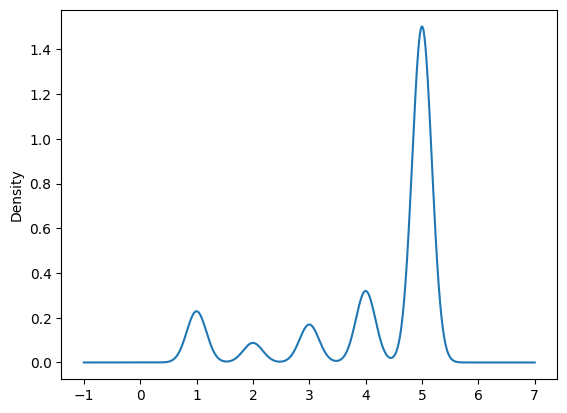

In [33]:
df_raw.rating.plot(kind="density")

<Axes: ylabel='Density'>

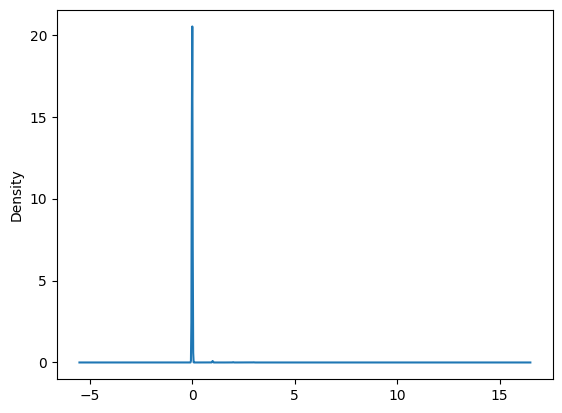

In [34]:
df_raw.images_by_user.plot(kind="density")

<Axes: ylabel='Density'>

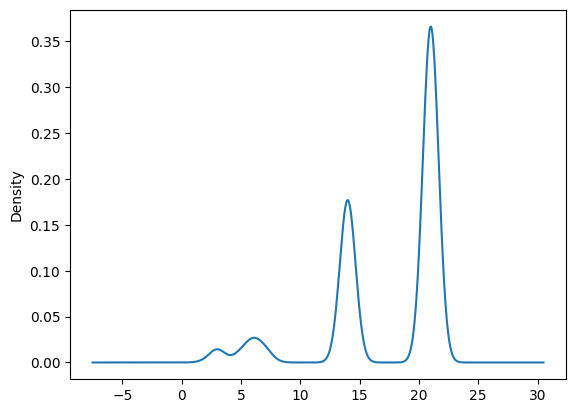

In [35]:
df_raw.images_of_product.plot(kind="density")

<Axes: xlabel='verified_purchase'>

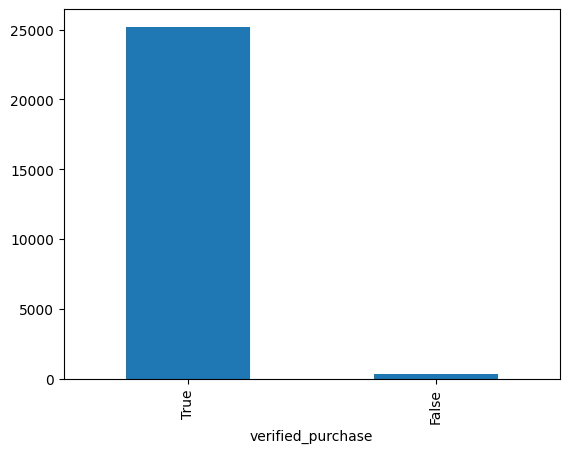

In [36]:
df_raw.verified_purchase.value_counts().plot(kind="bar")

<Axes: ylabel='Density'>

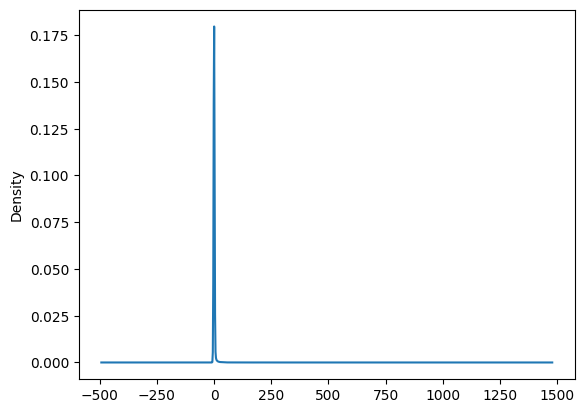

In [37]:
df_raw.helpful_vote.plot(kind="density")

# Features Processing

In the upcoming cells we will copy the dataframe "df_raw" into "df" in order to keep the original values for manual evaluation (text value vs encoded value)

In [38]:
df = df_raw.copy(deep=True)

In [39]:
df.head(1)

,rating,review_title,text,images_by_user,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,main_category,product_title,average_rating,rating_number,features,images_of_product,store
0,5.0,Perfect,Awesome app works amazing<br />This is a must,0,B01N0BP507,B01N0BP507,AF4XAUOI5XPGWHCPOTORKBIJSRDA,2018-08-11 17:35:28.884,0,True,Appstore for Android,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com


- Encoding categorical features using labelencoder (in order to minimize the number of features) : verified_purchase, main_category, store
- We will focus more on product by "parent_asin" since the meta brings info about the parent id only => "asin" will be dropped
- The timestamp feature will be transformed to 3 different values : Second of the day, Day of the year, the year. 
- The User Id will be deleted by will be replaced by user's behavior features (number of reviews, mean ratings, min-max ratings)

In [40]:
# Label Encoding function
from sklearn.preprocessing import LabelEncoder

def labelencodeer(s:pd.Series) :
    # Initialize the label encoder
    label_encoder = LabelEncoder() 

    # Apply label encoding
    return label_encoder.fit_transform(s)

In [41]:
# Label Encoder
df.verified_purchase = labelencodeer(df.verified_purchase)
df.main_category = labelencodeer(df.main_category)
df.verified_purchase = labelencodeer(df.verified_purchase)

In [42]:
# Drop "asin"
df.drop("asin", axis=1, inplace= True)

In [43]:
# Timestamp
df.timestamp = pd.to_datetime(df.timestamp)
df["year"] = df.timestamp.dt.year
df["day"] = df.timestamp.dt.day_of_year
df["hour"] = df.timestamp.dt.hour
df.drop("timestamp", axis=1, inplace=True)

In [44]:
# User ID
user_aggregated = df.groupby("user_id").agg({"rating" : ["count","mean"]})
user_aggregated.columns = ['_'.join(col) for col in user_aggregated.columns]
user_aggregated.reset_index(inplace=True)
user_aggregated

,user_id,rating_count,rating_mean
0,AE22BY4KMCFAG75SPASYEZQ4IM6Q,1,5.0
1,AE22BYNJ6WMWETRVHLP2P3CXCQQQ,1,5.0
2,AE22EEROH7NJ4EGDRKRRURM5GTYQ,1,5.0
3,AE22EMKSL7H7LR6RRQRULU6GROPA,1,4.0
4,AE22FIM3FU52FXK3ZUD7SMJI7UQQ,1,5.0
...,...,...,...
25014,AHZZGRDQZIUIMZ5BYXB33DCFUOOA,1,5.0
25015,AHZZHHDH2Z5YUUEUFPID473L3TOQ,1,1.0
25016,AHZZTC5OKY7FF7V5PUDOGMQAMFGA,1,5.0
25017,AHZZVAZOOI2VLLRPY44BRT66RAVA,1,5.0


<Axes: ylabel='Density'>

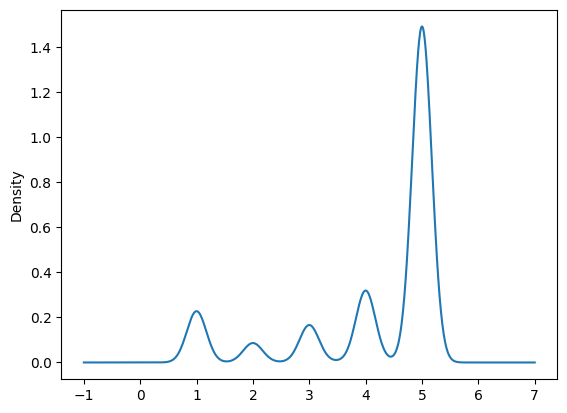

In [45]:
#user_aggregated.rating_count.plot(kind="density")
user_aggregated.rating_mean.plot(kind="density")

In [46]:
df = df.merge(user_aggregated,on='user_id',how='left')
df.rename(columns={'rating_count':'user_rating_count','rating_mean':'user_rating_mean'},inplace=True)
df.drop('user_id',axis=1,inplace=True)
df.head(2)

,rating,review_title,text,images_by_user,parent_asin,helpful_vote,verified_purchase,main_category,product_title,average_rating,rating_number,features,images_of_product,store,year,day,hour,user_rating_count,user_rating_mean
0,5.0,Perfect,Awesome app works amazing<br />This is a must,0,B01N0BP507,0,1,0,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com,2018,223,17,1,5.0
1,1.0,HUH?,I don't know what this is nor how I supposedly...,0,B01N0BP507,0,1,0,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com,2018,241,19,1,1.0


In [47]:
# Store label encoding
df.store = labelencodeer(df.store)

# Text Processing

In order to prepare the textual data into an input into the model, we will have to apply embdeiings techniques, yet before that we will need to clean the text :
 - Convert to lower case
 - Remove Urls
 - Remove punctuation
 - Remove stop words
 - Lemmatization
 - Handle special character


The features on which we will apply this process are : review_title, text, product_title, features

In [48]:
text_features = ["review_title", "text", "product_title", "features"]
# Ensuring String format
for col in text_features : 
    df[col] = df[col].apply(str)

In [49]:
for col in text_features :
    df[col+"_unprocessed"] = df[col]

In [50]:
# lower case
for col in text_features :
    df[col] = df[col].str.lower()

In [51]:
# Remove Urls
for col in text_features :
    df[col] = df[col].replace(r'http\S+|www.\S+', '', regex=True)

In [52]:
# Remove Punctuation
import string
for col in text_features :
    df[col] = df[col].str.translate(str.maketrans('', '', string.punctuation))

In [54]:
# Uncomment if stopwords are not downloaded
# import nltk
# nltk.download('stopwords')

In [55]:
# Removing stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

for col in text_features :
    df[col] = df[col].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [56]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

for col in text_features :
    df[col] = df[col].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

In [57]:
# Removing special caracters
import re
for col in text_features :
    df[col] = df[col].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))  # Removes non-ASCII characters

In [58]:
df.drop(["review_title_unprocessed", "text_unprocessed", "product_title_unprocessed", "features_unprocessed"], axis=1, inplace=True)

In [59]:
df.to_csv('data/processed_data/pre_all_process.csv', index=False)

In [60]:
# Lost data ==> Reaload 😁
df = pd.read_csv('data/processed_data/pre_all_process.csv')
text_features = ["review_title", "text", "product_title", "features"]

# Embedding

In [61]:
df_text = df[text_features].copy(deep=True)
df_text.fillna('',inplace=True) # Assuring no null value are included

## BERT base

In [63]:
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

# Load the pre-trained BERT base model from Sentence-Transformers
model = SentenceTransformer('bert-base-nli-mean-tokens')
embdeddings=list()

for col in text_features :
    print( f" Calculating {col} ....")
    df_text[col+'_embedding'] = model.encode(df_text[col].tolist()).tolist()

df_text.to_pickle("data/embeddings/v2/text_embeddings_bert_base.pkl")

 Calculating review_title ....
 Calculating text ....
 Calculating product_title ....
 Calculating features ....


## MPNet transformer

In [64]:
df_text_ = df[text_features].copy(deep=True)
df_text_.fillna('',inplace=True) # Assuring no null value are included

In [65]:
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

# Load the pre-trained BERT base model from Sentence-Transformers
model = SentenceTransformer('all-mpnet-base-v2')

for col in text_features :
    print( f" Calculating {col} ....")
    df_text_[col+'_embedding'] = model.encode(df_text_[col].tolist()).tolist()

df_text_.to_pickle("data/embeddings/v2/text_embeddings_mpnet.pkl")

 Calculating review_title ....


 Calculating text ....
 Calculating product_title ....
 Calculating features ....


# Model on textual data (Isolation forest)

In order to evaluate the textual embdedding and how much it will be useful for us to detect outliers, we will apply en isolation forest with error reconstruction in order to see how the data will get seperated.

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

## Bert base encoding

In [67]:
embdeddings_features = [col+'_embedding' for col in text_features]
df_embdeddings = df_text[embdeddings_features]
print("Array lenght : " , len(df_embdeddings.text_embedding.iloc[0]))
df_embdeddings.head(1)

Array lenght :  768


,review_title_embedding,text_embedding,product_title_embedding,features_embedding
0,"[-0.12355851382017136, -0.42993494868278503, 2...","[-0.03922344371676445, 0.6838127970695496, 1.3...","[0.14585737884044647, -0.4754962921142578, 2.2...","[-0.5046025514602661, 0.40231752395629883, 0.9..."


In [68]:
from sklearn.decomposition import PCA

n_components = 50  # Set desired number of PCA components

# Apply PCA on each embedding column
for col in embdeddings_features:
    # Step 1: Convert the list of embeddings into a 2D array
    embeddings_matrix = np.array(df_embdeddings[col].tolist())
    
    # Step 2: Apply PCA
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings_matrix)
    
    # Convert reduced embeddings back to list format for easy storage in DataFrame
    df_embdeddings[col + '_pca'] = list(reduced_embeddings)

# Check the result
pca_embdeddings_features = [col+'_pca' for col in embdeddings_features]
print("Array lenght : " , len(df_embdeddings.text_embedding_pca.iloc[0]))
print(df_embdeddings[pca_embdeddings_features])

/tmp/ipykernel_369165/4053199690.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_embdeddings[col + '_pca'] = list(reduced_embeddings)
/tmp/ipykernel_369165/4053199690.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_embdeddings[col + '_pca'] = list(reduced_embeddings)
/tmp/ipykernel_369165/4053199690.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Array lenght :  50
                              review_title_embedding_pca  \
0      [-5.666008825403199, -4.203251595962358, -2.97...   
1      [-4.022022674094561, 2.296403075031006, -6.325...   
2      [2.788748017974967, 1.6439787450689596, -4.420...   
3      [-5.920309094327587, -1.7733653004770518, 2.23...   
4      [8.531247421942396, -1.1874602819429705, 0.654...   
...                                                  ...   
25525  [-7.93234162759763, -3.738609478052171, -0.523...   
25526  [-4.110932467870175, 3.777554908206872, -6.046...   
25527  [-4.366140635636686, 3.1794014850745023, -7.05...   
25528  [-4.110932467870175, 3.777554908206872, -6.046...   
25529  [-4.181240003989244, 4.171991857964972, -3.346...   

                                      text_embedding_pca  \
0      [-0.6937857146948128, -4.914487228919016, -4.2...   
1      [-9.772091968236978, 4.739769017251431, 0.1987...   
2      [7.344861792877963, -0.1216124786817323, -0.58...   
3      [6.0295819247

In [69]:
df_array = df_embdeddings[pca_embdeddings_features].copy(deep=True)
prefix_dict = {'review_title_embedding_pca':"RTE_", 
                'text_embedding_pca':'TE_',
                'product_title_embedding_pca':'PTE_',
                'features_embedding_pca':'FE_'} # This dictionnary will be used for adding prefix to the new features
for col in pca_embdeddings_features :
    df_array = df_array.join(pd.DataFrame(df_array[col].tolist(), index=df_array.index).add_prefix(prefix_dict[col]))
    df_array.drop(col, axis =1 , inplace=True)
print("New columns : " , df_array.columns)
df_array.head(1)

New columns :  Index(['RTE_0', 'RTE_1', 'RTE_2', 'RTE_3', 'RTE_4', 'RTE_5', 'RTE_6', 'RTE_7',
       'RTE_8', 'RTE_9',
       ...
       'FE_40', 'FE_41', 'FE_42', 'FE_43', 'FE_44', 'FE_45', 'FE_46', 'FE_47',
       'FE_48', 'FE_49'],
      dtype='object', length=200)


,RTE_0,RTE_1,RTE_2,RTE_3,RTE_4,RTE_5,RTE_6,RTE_7,RTE_8,RTE_9,...,FE_40,FE_41,FE_42,FE_43,FE_44,FE_45,FE_46,FE_47,FE_48,FE_49
0,-5.666009,-4.203252,-2.976492,4.872801,1.690106,1.317226,-0.07075,0.252415,1.19413,-2.297344,...,-2.220446e-16,5.551115e-17,-4.440892e-16,8.881784e-16,6.661338e-16,3.885781e-16,1.776357e-15,-2.220446e-16,1.318390e-16,4.440892e-16


In [70]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_array_scaled = scaler.fit_transform(df_array)

In [71]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming train_data and test_data are your train and test datasets

# Step 1: Initialize and fit IsolationForest
iso_forest = IsolationForest(contamination=0.005, random_state=42)
iso_forest.fit(df_array_scaled)

# Step 2: Predict anomalies
predictions = iso_forest.predict(df_array_scaled)  # -1 for outliers, 1 for inliers

# Step 3: Get anomaly scores (lower scores indicate higher anomaly likelihood)
anomaly_scores = iso_forest.decision_function(df_array_scaled)

# Step 4: Normalize scores to get probabilities
scaler = MinMaxScaler(feature_range=(0, 1))
probabilities = scaler.fit_transform(-anomaly_scores.reshape(-1, 1))  # Invert scores so higher values mean more anomalous

# Step 5: Create a DataFrame to display the results
df_iso = pd.DataFrame({
    'prediction': predictions,
    'anomaly_score': anomaly_scores,
    'anomaly_probability': probabilities.flatten()  # Flatten to make it a 1D array for easier interpretation
})

# Display the result
print(df_iso.head())

   prediction  anomaly_score  anomaly_probability
0           1       0.245129             0.081264
1           1       0.217765             0.160561
2           1       0.256748             0.047593
3           1       0.221487             0.149776
4           1       0.262175             0.031864


In [72]:
df_iso.prediction.value_counts()

prediction
 1    25402
-1      128
Name: count, dtype: int64

<Axes: ylabel='Density'>

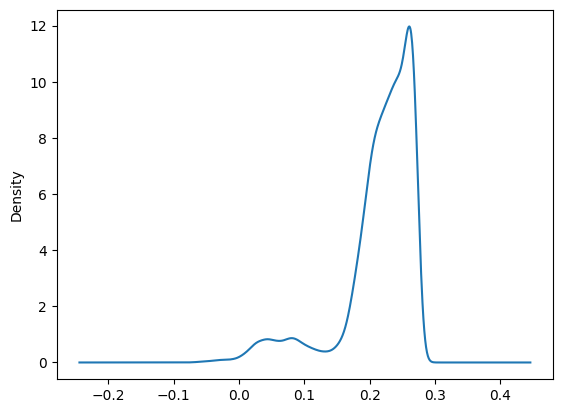

In [73]:
df_iso.anomaly_score.plot(kind='density')

<Axes: ylabel='Density'>

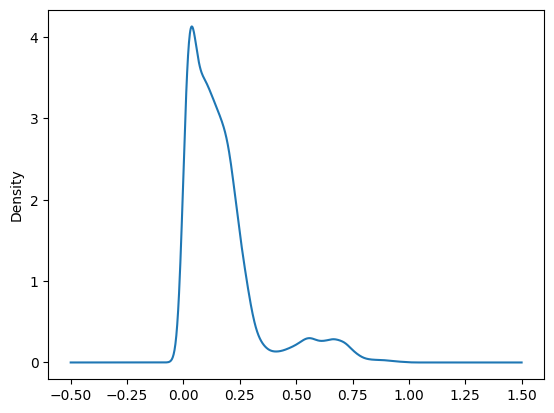

In [74]:
df_iso.anomaly_probability.plot(kind='density')

In [75]:
print(df_text.iloc[df_iso[df_iso.prediction == -1].index].shape)
print(df_text.iloc[df_iso[df_iso.prediction == -1].index][text_features].drop_duplicates().shape)

(128, 8)
(128, 4)


In [76]:
print(df.iloc[df_iso[df_iso.prediction == -1].index].shape)
print(df.iloc[df_iso[df_iso.prediction == -1].index].drop_duplicates().shape)

(128, 19)
(128, 19)


In [85]:
# Reviewing the highlighed anonalis in their raw format
df.iloc[df_iso[df_iso.prediction == -1].sort_values("anomaly_probability",ascending=False).index].head(5)

,rating,review_title,text,images_by_user,parent_asin,helpful_vote,verified_purchase,main_category,product_title,average_rating,rating_number,features,images_of_product,store,year,day,hour,user_rating_count,user_rating_mean
23676,5.0,perfect jerk kitty,absolutely purrfect two demonically possessed cat,0,B09WC47S3V,3,1,2,kitnipbox happy cat box monthly cat subscripti...,4.1,2962.0,bestselling cat subscription box get variety c...,7,10,2018,330,2,1,5.0
23892,5.0,cat love toy,love kitty champagne yes drink cat,0,B09WC47S3V,8,1,2,kitnipbox happy cat box monthly cat subscripti...,4.1,2962.0,bestselling cat subscription box get variety c...,7,10,2018,250,22,2,5.0
23330,4.0,make cat happy,get satisfaction watching cat play item worth ...,0,B09WC47S3V,0,1,2,kitnipbox happy cat box monthly cat subscripti...,4.1,2962.0,bestselling cat subscription box get variety c...,7,10,2018,315,21,1,4.0
23436,5.0,perfect get kid started coding,kid love easy follow get immediate result keep...,0,B07FSV6S9M,10,1,2,bitsbox coding subscription box kid age 612 st...,4.4,958.0,voted 1 stem box kid kid start coding example ...,6,4,2018,269,10,1,5.0
23165,5.0,cat box,cute toy treat xmas gift delight year long,0,B09WC47S3V,0,1,2,kitnipbox happy cat box monthly cat subscripti...,4.1,2962.0,bestselling cat subscription box get variety c...,7,10,2018,310,20,1,5.0


Apparently the reviews falgged with the highest don't seem to be that suspisicous, let's dive more and apply more complexed methods.

But first I would like to focus only on review features (review_title, text)

In [92]:

df_array_scaled_ = df_array_scaled[:,:2] # Keeping on the first 2 textual features
iso_forest = IsolationForest(contamination=0.005, random_state=42)
iso_forest.fit(df_array_scaled_)

# Step 2: Predict anomalies
predictions = iso_forest.predict(df_array_scaled_)  # -1 for outliers, 1 for inliers

# Step 3: Get anomaly scores (lower scores indicate higher anomaly likelihood)
anomaly_scores = iso_forest.decision_function(df_array_scaled_)

# Step 4: Normalize scores to get probabilities
scaler = MinMaxScaler(feature_range=(0, 1))
probabilities = scaler.fit_transform(-anomaly_scores.reshape(-1, 1))  # Invert scores so higher values mean more anomalous

# Step 5: Create a DataFrame to display the results
df_iso_ = pd.DataFrame({
    'prediction': predictions,
    'anomaly_score': anomaly_scores,
    'anomaly_probability': probabilities.flatten()  # Flatten to make it a 1D array for easier interpretation
})

# Display the result
print(f"flagged reviews : {df_iso_[df_iso_.prediction == -1].shape[0]}")
print(df_iso_.head())

flagged reviews : 128
   prediction  anomaly_score  anomaly_probability
0           1       0.149713             0.184508
1           1       0.166221             0.113566
2           1       0.134456             0.250077
3           1       0.190087             0.011001
4           1       0.172389             0.087062


In [110]:
df.iloc[df_iso_[df_iso_.prediction == -1].sort_values("anomaly_probability",ascending=False).index].head(5)

,rating,review_title,text,images_by_user,parent_asin,helpful_vote,verified_purchase,main_category,product_title,average_rating,rating_number,features,images_of_product,store,year,day,hour,user_rating_count,user_rating_mean
1585,5.0,excellent product work great easy use,excellent product work great easy use,0,B01N0BP507,2,1,0,downloader,4.2,672812.0,download file entering url builtin web browser...,21,0,2016,347,0,2,3.0
4962,5.0,great product easy work understand,great product easy work understand,0,B01N0BP507,0,1,0,downloader,4.2,672812.0,download file entering url builtin web browser...,21,0,2018,117,19,1,5.0
14735,5.0,great program great support intuitive easy use,first program get clear instruction intuitive ...,0,B01N0BP507,0,1,0,downloader,4.2,672812.0,download file entering url builtin web browser...,21,0,2018,229,14,1,5.0
23964,5.0,stimulating learning made fun thanks,club delivery grandkids age 7 6 fascinated two...,0,B01M7UDAVI,0,1,2,stem club toy subscription 57 year old,4.4,2376.0,subscribe save 40 stem toy discover highlyrate...,6,14,2018,33,22,1,5.0
25478,1.0,product unintuitive use requires installing so...,product unintuitive use requires installing so...,0,B0BL65X86R,0,1,3,25 playstation store gift card digital code,4.7,261278.0,must 18yrs account playstation network redeem ...,3,12,2018,349,19,1,1.0


The Previous results were more influenced by the product data (product_title and features). So we need to find a way to focus more on the comparison between this data

## MPNet base encoding

In [95]:
embdeddings_features = [col+'_embedding' for col in text_features]
df_embdeddings = df_text_[embdeddings_features]
print("Array lenght : " , len(df_embdeddings.text_embedding.iloc[0]))
df_embdeddings.head(1)

Array lenght :  768


,review_title_embedding,text_embedding,product_title_embedding,features_embedding
0,"[-0.035120680928230286, 0.0654645711183548, -0...","[-0.0038130583707243204, -0.025439321994781494...","[-0.001112602767534554, 0.025409506633877754, ...","[0.04016068950295448, -0.011409720405936241, -..."


In [96]:
from sklearn.decomposition import PCA

n_components = 50  # Set desired number of PCA components

# Apply PCA on each embedding column
for col in embdeddings_features:
    # Step 1: Convert the list of embeddings into a 2D array
    embeddings_matrix = np.array(df_embdeddings[col].tolist())
    
    # Step 2: Apply PCA
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings_matrix)
    
    # Convert reduced embeddings back to list format for easy storage in DataFrame
    df_embdeddings[col + '_pca'] = list(reduced_embeddings)

# Check the result
pca_embdeddings_features = [col+'_pca' for col in embdeddings_features]
print("Array lenght : " , len(df_embdeddings.text_embedding_pca.iloc[0]))
print(df_embdeddings[pca_embdeddings_features])

/tmp/ipykernel_369165/4053199690.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_embdeddings[col + '_pca'] = list(reduced_embeddings)
/tmp/ipykernel_369165/4053199690.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_embdeddings[col + '_pca'] = list(reduced_embeddings)


Array lenght :  50
                              review_title_embedding_pca  \
0      [-0.3593979367246175, 0.16675450307219553, -0....   
1      [-0.43198387469563315, 0.061218699586392436, -...   
2      [0.39737911439537543, -0.3364910711213063, 0.0...   
3      [-0.4496748675068635, 0.10083969637188961, 0.3...   
4      [0.49397290282283446, 0.15311237366604408, 0.0...   
...                                                  ...   
25525  [-0.3612774123427334, -0.014922087600860882, -...   
25526  [-0.39662218759569123, 0.003330215666183002, -...   
25527  [-0.390344766535913, -0.056165757121524995, -0...   
25528  [-0.39662218759569123, 0.003330215666183002, -...   
25529  [-0.40323842680247485, 0.046036930214106445, 0...   

                                      text_embedding_pca  \
0      [-0.2447519162831559, 0.16291770047841975, -0....   
1      [-0.16190595268225894, 0.027285153553318883, 0...   
2      [0.2718933788899721, 0.39391806663588247, 0.27...   
3      [0.2299164088

/tmp/ipykernel_369165/4053199690.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_embdeddings[col + '_pca'] = list(reduced_embeddings)


In [97]:
df_array = df_embdeddings[pca_embdeddings_features].copy(deep=True)
prefix_dict = {'review_title_embedding_pca':"RTE_", 
                'text_embedding_pca':'TE_',
                'product_title_embedding_pca':'PTE_',
                'features_embedding_pca':'FE_'} # This dictionnary will be used for adding prefix to the new features
for col in pca_embdeddings_features :
    df_array = df_array.join(pd.DataFrame(df_array[col].tolist(), index=df_array.index).add_prefix(prefix_dict[col]))
    df_array.drop(col, axis =1 , inplace=True)
print("New columns : " , df_array.columns)
df_array.head(1)

New columns :  Index(['RTE_0', 'RTE_1', 'RTE_2', 'RTE_3', 'RTE_4', 'RTE_5', 'RTE_6', 'RTE_7',
       'RTE_8', 'RTE_9',
       ...
       'FE_40', 'FE_41', 'FE_42', 'FE_43', 'FE_44', 'FE_45', 'FE_46', 'FE_47',
       'FE_48', 'FE_49'],
      dtype='object', length=200)


,RTE_0,RTE_1,RTE_2,RTE_3,RTE_4,RTE_5,RTE_6,RTE_7,RTE_8,RTE_9,...,FE_40,FE_41,FE_42,FE_43,FE_44,FE_45,FE_46,FE_47,FE_48,FE_49
0,-0.359398,0.166755,-0.39976,-0.114822,-0.073147,-0.12245,-0.071,-0.003669,-0.025796,0.010262,...,1.170938e-17,7.285839e-17,-3.469447e-17,1.387779e-17,-1.387779e-17,6.938894e-18,6.245005e-17,1.734723e-17,7.632783e-17,2.775558e-17


In [98]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_array_scaled = scaler.fit_transform(df_array)

In [99]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming train_data and test_data are your train and test datasets

# Step 1: Initialize and fit IsolationForest
iso_forest = IsolationForest(contamination=0.005, random_state=42)
iso_forest.fit(df_array_scaled)

# Step 2: Predict anomalies
predictions = iso_forest.predict(df_array_scaled)  # -1 for outliers, 1 for inliers

# Step 3: Get anomaly scores (lower scores indicate higher anomaly likelihood)
anomaly_scores = iso_forest.decision_function(df_array_scaled)

# Step 4: Normalize scores to get probabilities
scaler = MinMaxScaler(feature_range=(0, 1))
probabilities = scaler.fit_transform(-anomaly_scores.reshape(-1, 1))  # Invert scores so higher values mean more anomalous

# Step 5: Create a DataFrame to display the results
df_iso = pd.DataFrame({
    'prediction': predictions,
    'anomaly_score': anomaly_scores,
    'anomaly_probability': probabilities.flatten()  # Flatten to make it a 1D array for easier interpretation
})

# Display the result
print(df_iso.head())

   prediction  anomaly_score  anomaly_probability
0           1       0.158213             0.223213
1           1       0.158839             0.220915
2           1       0.200989             0.066325
3           1       0.152584             0.243855
4           1       0.197544             0.078961


In [100]:
df_iso.prediction.value_counts()

prediction
 1    25402
-1      128
Name: count, dtype: int64

<Axes: ylabel='Density'>

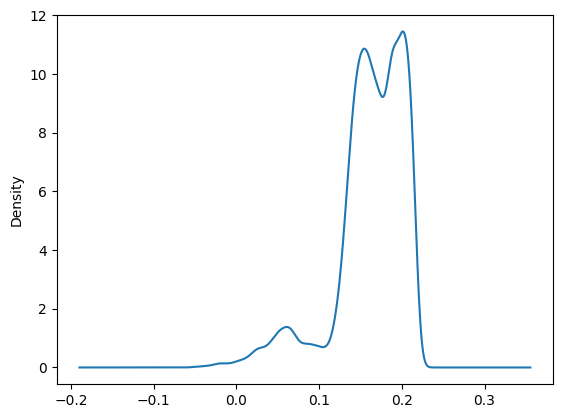

In [101]:
df_iso.anomaly_score.plot(kind='density')

<Axes: ylabel='Density'>

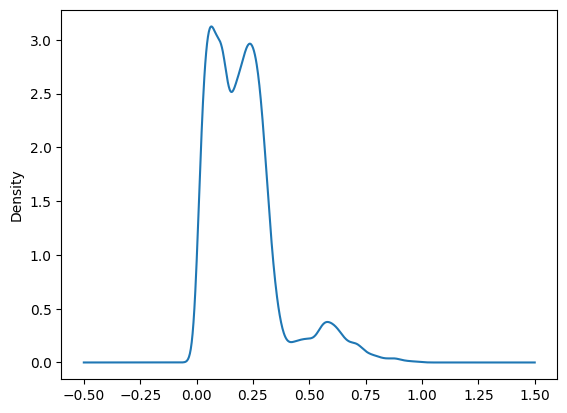

In [102]:
df_iso.anomaly_probability.plot(kind='density')

In [113]:
df.iloc[df_iso[df_iso.prediction == -1].sort_values("anomaly_probability",ascending=False).index]

,rating,review_title,text,images_by_user,parent_asin,helpful_vote,verified_purchase,main_category,product_title,average_rating,rating_number,features,images_of_product,store,year,day,hour,user_rating_count,user_rating_mean
24285,2.0,poor value price,worth,0,B07DVXFP2N,0,1,2,snacknation ultrapremium healthy snack box sub...,3.8,649.0,indulge tasty chip nutrition bar savory jerky ...,2,17,2018,341,22,1,2.0
24743,5.0,good variety different snack would normally pu...,good variety different snack would normally pu...,0,B07DVXFP2N,2,1,2,snacknation ultrapremium healthy snack box sub...,3.8,649.0,indulge tasty chip nutrition bar savory jerky ...,2,17,2018,301,13,1,5.0
23688,3.0,ended subscription one box,cute idea okay selection snack item tiny sampl...,0,B07DVXFP2N,38,1,2,snacknation ultrapremium healthy snack box sub...,3.8,649.0,indulge tasty chip nutrition bar savory jerky ...,2,17,2018,233,16,1,3.0
24469,5.0,great healthy snack,great healthy snack never tried absolutely loved,0,B07DVNJ5LP,0,1,2,snacknation ultrapremium healthy snack box sub...,3.8,650.0,indulge tasty chip nutrition bar savory jerky ...,2,17,2018,360,18,1,5.0
24299,5.0,quality healthy snack,come snacking quality variety convenience esse...,0,B07DVXFP2N,3,1,2,snacknation ultrapremium healthy snack box sub...,3.8,649.0,indulge tasty chip nutrition bar savory jerky ...,2,17,2018,249,22,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24927,5.0,stem,great selection educational toy,0,B01M7UD21X,0,1,2,stem club toy subscription 813 year old,4.4,2376.0,subscribe save 40 stem toy discover highlyrate...,5,14,2017,258,17,1,5.0
23910,4.0,lot good chew item pupster,lot good chew item pupster kept interested las...,0,B07HQGFM1W,2,1,2,pawstruck natural dog chew box large dog 50lbs,4.1,604.0,tasty natural chew dog love dog love safe heal...,4,11,2018,351,12,1,4.0
23280,5.0,whats dog love,three pup loved treat variety,0,B07HQCCD29,3,1,2,pawstruck natural dog chew box small dog 20 lb,3.4,248.0,tasty natural chew dog love dog love safe heal...,4,11,2018,324,23,1,5.0
24957,5.0,fun surprise like christmas every day,receiving cairn box two year exposed many uniq...,0,B07KC11QFV,23,0,2,cairn outdoor subscription box,3.4,279.0,original box outdoor enthusiast cairn proud fi...,8,5,2018,333,4,1,5.0


The isolation forest is not showing some interesting outliers eventhough we have switched into MPNet embeddings. Yet the results are better than Bert base embeddings, so for the next steps we will continue with MPnet

# Data split train, test, validation And models

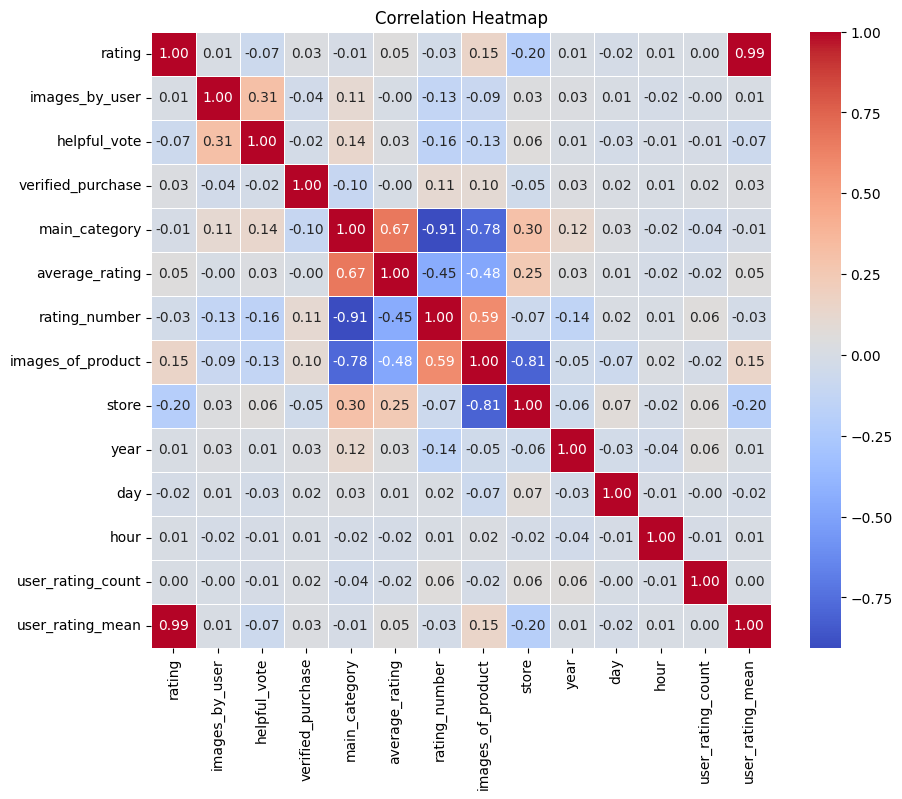

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.DataFrame(...) 

# Calculate the correlation matrix
corr = df.drop(["review_title","text","parent_asin","product_title","features"],axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Due to correlation map, we can reduce the number of features by 3 : main_category, Images_of_product, user_rating_mean

## AutoEncoders

In [166]:
# joining text embeddings & numerical features
df_data = df.drop(
                    ["review_title","text","parent_asin","product_title","features", # replaced by their embeddings
                     "main_category","images_of_product","user_rating_mean" # removed after corr map
                     ],axis=1).join(df_array)
print(df_data.shape)
df_data.head(3)

(25530, 211)


,rating,images_by_user,helpful_vote,verified_purchase,average_rating,rating_number,store,year,day,hour,...,FE_40,FE_41,FE_42,FE_43,FE_44,FE_45,FE_46,FE_47,FE_48,FE_49
0,5.0,0,0,1,4.2,672812.0,0,2018,223,17,...,1.170938e-17,7.285839e-17,-3.469447e-17,1.387779e-17,-1.387779e-17,6.938894e-18,6.245005e-17,1.734723e-17,7.632783e-17,2.775558e-17
1,1.0,0,0,1,4.2,672812.0,0,2018,241,19,...,1.170938e-17,7.285839e-17,-3.469447e-17,1.387779e-17,-1.387779e-17,6.938894e-18,6.245005e-17,1.734723e-17,7.632783e-17,2.775558e-17
2,4.0,0,0,1,4.2,672812.0,0,2017,243,15,...,1.170938e-17,7.285839e-17,-3.469447e-17,1.387779e-17,-1.387779e-17,6.938894e-18,6.245005e-17,1.734723e-17,7.632783e-17,2.775558e-17


In [135]:
# Step1 : Prepare the train, test, val datasets
train_data, temp_data = train_test_split(df_data.reset_index(), test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [136]:
# Saving the original index for later inspections
train_original_index = train_data.index
validation_original_index = validation_data.index
test_original_index = test_data.index

train_data.drop("index", axis = 1, inplace = True)
validation_data.drop("index", axis = 1, inplace = True)
test_data.drop("index", axis = 1, inplace = True)

In [137]:
# Normalize the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
validation_data = scaler.transform(validation_data)
test_data = scaler.transform(test_data)

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Define the Autoencoder Model
input_dim = train_data.shape[1]
encoding_dim = 10  # to be adjusted (since input dim > 200 reducing it to 10 will be good)

autoencoder = Sequential([
    # Encoder
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(encoding_dim, activation='relu'),  # Encoded layer

    # Decoder
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(input_dim, activation='sigmoid')  # Output layer
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Step 3: Train the Autoencoder
history = autoencoder.fit(
    train_data,
    train_data,  # Target is the same as input for autoencoders
    epochs=50,
    batch_size=32,
    validation_data=(validation_data, validation_data)
)

# Step 4: Evaluate on Test Set
test_loss = autoencoder.evaluate(test_data, test_data)
print(f"Test Loss: {test_loss}")

Epoch 1/50


/home/ec2-user/.local/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


559/559 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0162 - val_loss: 0.0091
Epoch 2/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0087 - val_loss: 0.0077
Epoch 3/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0076 - val_loss: 0.0071
Epoch 4/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 5/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0069 - val_loss: 0.0068
Epoch 6/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0067 - val_loss: 0.0066
Epoch 7/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 8/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 9/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0063 - val_loss: 0.0062
Epoch 10/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 11/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0062 - val_loss: 0.0061
Epoch 12/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.

In [151]:
import pickle
import json

# 1. Save Model Architecture and Weights Separately in Pickle-Compatible Format
# Save model architecture as JSON
model_json = autoencoder.to_json()
with open("data/model_weights/v2/autoencoder_model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights in a pickle file
model_weights = autoencoder.get_weights()
with open("data/model_weights/v2/autoencoder_weights.pkl", "wb") as file:
    pickle.dump(model_weights, file)

# 2. Save Training History as JSON or Pickle
# Convert history.history dict to JSON
with open("data/model_weights/v2/training_history.json", "w") as file:
    json.dump(history.history, file)

In [ ]:
from tensorflow.keras.models import model_from_json
# Load model architecture
with open("data/autoencoder_model.json", "r") as json_file:
    loaded_model_json = json_file.read()
autoencoder = model_from_json(loaded_model_json)

# Load model weights
with open("data/autoencoder_weights.pkl", "rb") as file:
    model_weights = pickle.load(file)
autoencoder.set_weights(model_weights)

# Compile the model (required after loading)
autoencoder.compile(optimizer='adam', loss='mse')

# Load training history
with open("data/training_history.json", "r") as file:
    history = json.load(file)

2024-10-28 12:03:58.842618: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [152]:
autoencoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │        13,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 211)            │        13,715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,473 (376.85 KB)

 Trainable params: 32,157 (125.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64,316 (251.24 KB)

In [153]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assume test_data is your test dataset and autoencoder is the trained model
reconstructed_data = autoencoder.predict(test_data)
reconstruction_errors = np.mean(np.square(test_data - reconstructed_data), axis=1)  # MSE per sample

 68/120 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


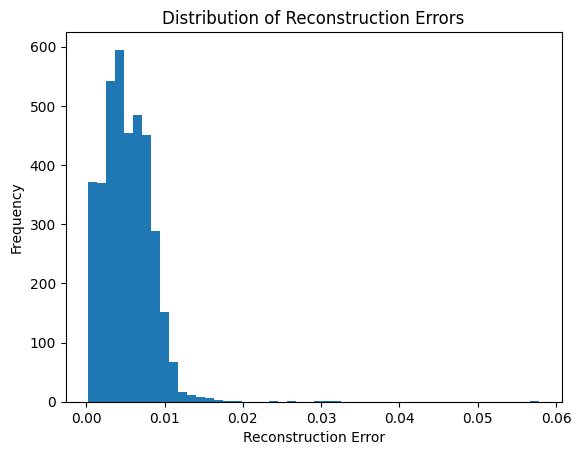

In [154]:
import matplotlib.pyplot as plt

plt.hist(reconstruction_errors, bins=50)
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Reconstruction Errors")
plt.show()

In [155]:
# Threshold for outliers
threshold = np.percentile(reconstruction_errors, 99.9)  # 95th percentile
print(threshold)

0.02997036166532538


In [156]:
float(round(threshold, 4))

0.03

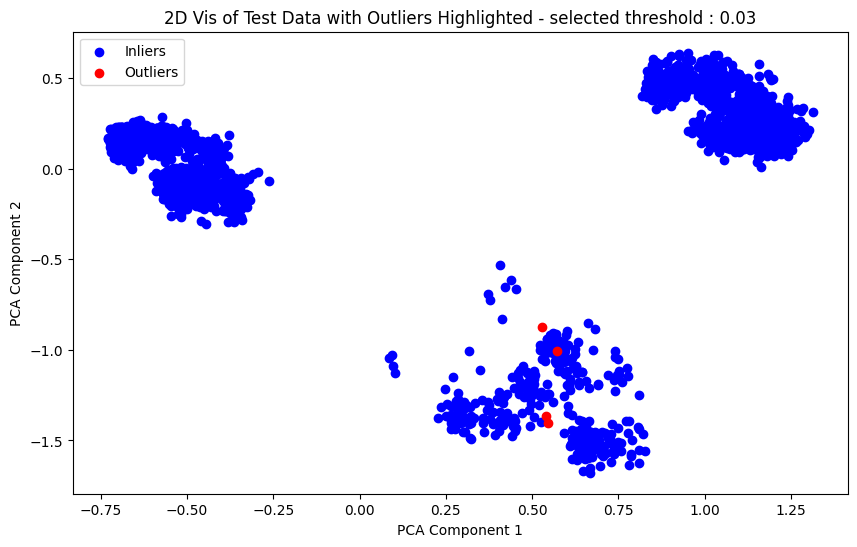

In [157]:
# Step 2: Set a Threshold for Outliers
threshold = np.percentile(reconstruction_errors, 99.9)  # e.g., 95th percentile
outliers = reconstruction_errors > threshold

# Step 3: Reduce test_data to 2D using PCA
pca = PCA(n_components=2)
test_data_2d = pca.fit_transform(test_data)

# Step 4: Plot the Data with Outliers Highlighted
plt.figure(figsize=(10, 6))
plt.scatter(test_data_2d[~outliers, 0], test_data_2d[~outliers, 1], color='blue', label='Inliers')
plt.scatter(test_data_2d[outliers, 0], test_data_2d[outliers, 1], color='red', label='Outliers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Vis of Test Data with Outliers Highlighted' + f" - selected threshold : {float(round(threshold, 4))}")
plt.legend()
plt.show()

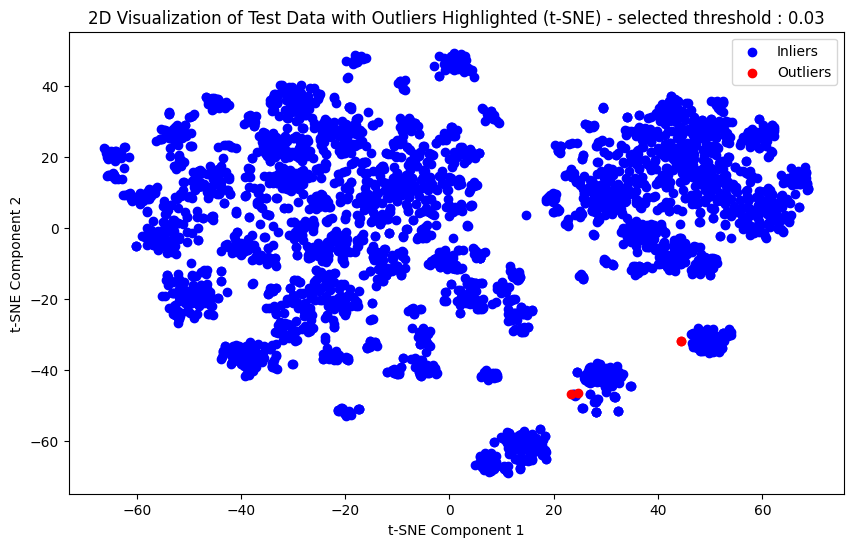

In [158]:
from sklearn.manifold import TSNE

# Step 2: Set a Threshold for Outliers
threshold = np.percentile(reconstruction_errors, 99.9)  # e.g., 95th percentile
outliers = reconstruction_errors > threshold

# Step 3: Reduce test_data to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
test_data_2d = tsne.fit_transform(test_data)

# Step 4: Plot the Data with Outliers Highlighted
plt.figure(figsize=(10, 6))
plt.scatter(test_data_2d[~outliers, 0], test_data_2d[~outliers, 1], color='blue', label='Inliers')
plt.scatter(test_data_2d[outliers, 0], test_data_2d[outliers, 1], color='red', label='Outliers')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D Visualization of Test Data with Outliers Highlighted (t-SNE)'+ f" - selected threshold : {float(round(threshold, 4))}")
plt.legend()
plt.show()

In [159]:
outliers_index = list(pd.Series(test_original_index)[outliers].values)
df_outliers = df.iloc[outliers_index]
df_outliers

,rating,review_title,text,images_by_user,parent_asin,helpful_vote,verified_purchase,main_category,product_title,average_rating,rating_number,features,images_of_product,store,year,day,hour,user_rating_count,user_rating_mean
25207,5.0,awesome,great item,0,B0BL65X86R,0,1,3,25 playstation store gift card digital code,4.7,261278.0,must 18yrs account playstation network redeem ...,3,12,2016,39,22,1,5.0
23929,1.0,prime surprise sweet box better,amazon prime surprise sweet better candy club ...,0,B07GC1XFJ7,60,0,2,candy club delicious premium candy subscriptio...,3.4,391.0,indulge delectable monthly candy subscription ...,7,6,2018,276,16,1,1.0
25218,5.0,better going store lol,quick easy,0,B0BL65X86R,0,1,3,25 playstation store gift card digital code,4.7,261278.0,must 18yrs account playstation network redeem ...,3,12,2018,331,18,1,5.0
23318,1.0,expect mostly sour pack least 23rds sour,got 1 6 sour candy expect get sour candy choco...,2,B07GC3QLWS,20,1,2,candy club delicious premium candy subscriptio...,3.4,391.0,indulge delectable monthly candy subscription ...,7,6,2018,335,16,2,1.0


## DAEF autoencoder

Refer to paper :

Explained anomaly detection in text reviews: Can subjective scenarios be correctly evaluated?
David Novoa-Paradela ∗, Oscar Fontenla-Romero, Bertha Guijarro-Berdiñas
https://doi.org/10.1016/j.engappai.2024.108065

In [164]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, concatenate, GaussianNoise
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Parameters
input_dim = train_data.shape[1] # Original feature dimension
latent_dim = 64  # Dimension of the encoded (latent) representation
noise_factor = 0.1  # Noise level for denoising

# Define the main input (e.g., raw features)
main_input = Input(shape=(input_dim,), name="main_input")

# Add noise for denoising
noisy_input = GaussianNoise(noise_factor)(main_input)

# Encoder
encoded = Dense(128, activation="relu")(noisy_input)
encoded = Dense(64, activation="relu")(encoded)
latent = Dense(latent_dim, activation="relu", name="latent")(encoded)

# Decoder
decoded = Dense(64, activation="relu")(latent)
decoded = Dense(128, activation="relu")(decoded)
decoded_output = Dense(input_dim, activation="sigmoid", name="decoded_output")(decoded)

# Define the model
daef_autoencoder = Model(inputs=main_input, outputs=decoded_output)

# Compile the model
daef_autoencoder.compile(optimizer=Adam(), loss="mse")

# Display model summary
daef_autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ main_input (InputLayer)         │ (None, 211)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_1                │ (None, 211)            │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        27,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent (Dense)                  │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoded_output (Dense)          │ (None, 211)            │        27,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,251 (309.57 KB)

 Trainable params: 79,251 (309.57 KB)

 Non-trainable params: 0 (0.00 B)

In [165]:
main_data = train_data
noisy_main_data = main_data + noise_factor * np.random.normal(size=main_data.shape)  # Add noise

# Train the model
deaf_history = daef_autoencoder.fit(
    noisy_main_data,  # Noisy input + embedding
    main_data,  # Target is the original clean input
    epochs=70, # value selected after multiple essays
    batch_size=32,
    validation_split=0.2
)

Epoch 1/70


447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0147 - val_loss: 0.0084
Epoch 2/70
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0080 - val_loss: 0.0075
Epoch 3/70
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0073 - val_loss: 0.0069
Epoch 4/70
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 5/70
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 6/70
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0064 - val_loss: 0.0062
Epoch 7/70
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0063 - val_loss: 0.0060
Epoch 8/70
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061 - val_loss: 0.0059
Epoch 9/70
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 10/70
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 11/70
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 12/70
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

In [168]:
import pickle
import json

# 1. Save Model Architecture and Weights Separately in Pickle-Compatible Format
# Save model architecture as JSON
model_json = daef_autoencoder.to_json()
with open("data/model_weights/v2/daef_autoencoder_model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights in a pickle file
model_weights = daef_autoencoder.get_weights()
with open("data/model_weights/v2/daef_autoencoder_weights.pkl", "wb") as file:
    pickle.dump(model_weights, file)

# 2. Save Training History as JSON or Pickle
# Convert history.history dict to JSON
with open("data/model_weights/v2/daef_training_history.json", "w") as file:
    json.dump(deaf_history.history, file)

In [ ]:
from tensorflow.keras.models import model_from_json
# Load model architecture
with open("data/autoencoder_model.json", "r") as json_file:
    loaded_model_json = json_file.read()
daef_autoencoder = model_from_json(loaded_model_json)

# Load model weights
with open("data/autoencoder_weights.pkl", "rb") as file:
    model_weights = pickle.load(file)
daef_autoencoder.set_weights(model_weights)

# Compile the model (required after loading)
daef_autoencoder.compile(optimizer='adam', loss='mse')

# Load training history
with open("data/training_history.json", "r") as file:
    deaf_history = json.load(file)

2024-10-28 12:03:58.842618: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [169]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assume test_data is your test dataset and autoencoder is the trained model
reconstructed_data = daef_autoencoder.predict(test_data)
reconstruction_errors = np.mean(np.square(test_data - reconstructed_data), axis=1)  # MSE per sample

 67/120 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


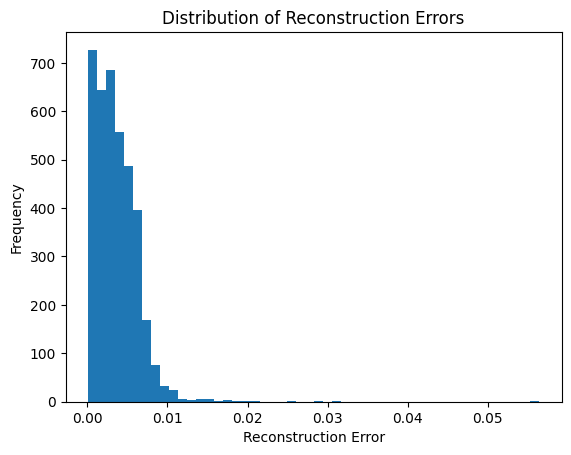

In [170]:
import matplotlib.pyplot as plt

plt.hist(reconstruction_errors, bins=50)
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Reconstruction Errors")
plt.show()

In [171]:
# Threshold for outliers
threshold = np.percentile(reconstruction_errors, 99.9)  # 95th percentile
print(threshold)

0.028677639099024203


In [172]:
float(round(threshold, 4))

0.0287

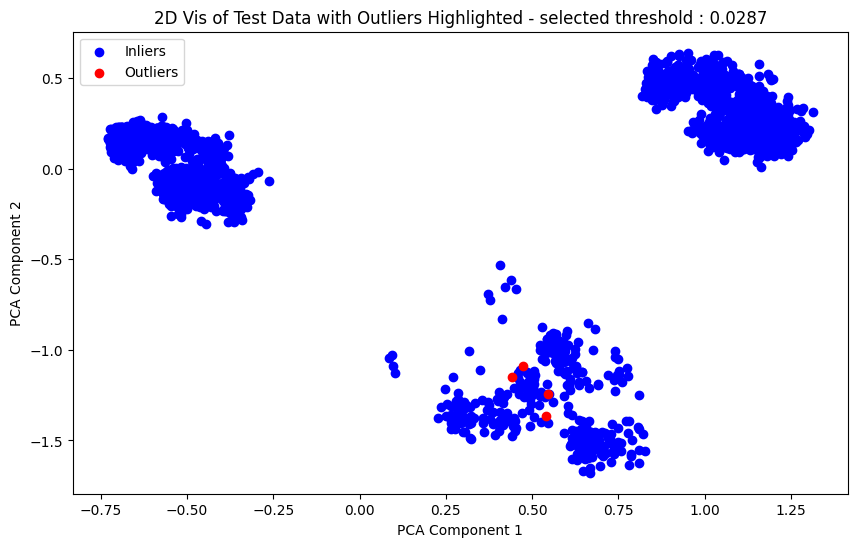

In [180]:
# Step 2: Set a Threshold for Outliers
threshold = np.percentile(reconstruction_errors, 99.9)  # e.g., 95th percentile
outliers = reconstruction_errors > threshold

# Step 3: Reduce test_data to 2D using PCA
pca = PCA(n_components=2)
test_data_2d = pca.fit_transform(test_data)

# Step 4: Plot the Data with Outliers Highlighted
plt.figure(figsize=(10, 6))
plt.scatter(test_data_2d[~outliers, 0], test_data_2d[~outliers, 1], color='blue', label='Inliers')
plt.scatter(test_data_2d[outliers, 0], test_data_2d[outliers, 1], color='red', label='Outliers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Vis of Test Data with Outliers Highlighted' + f" - selected threshold : {float(round(threshold, 4))}")
plt.legend()
plt.show()

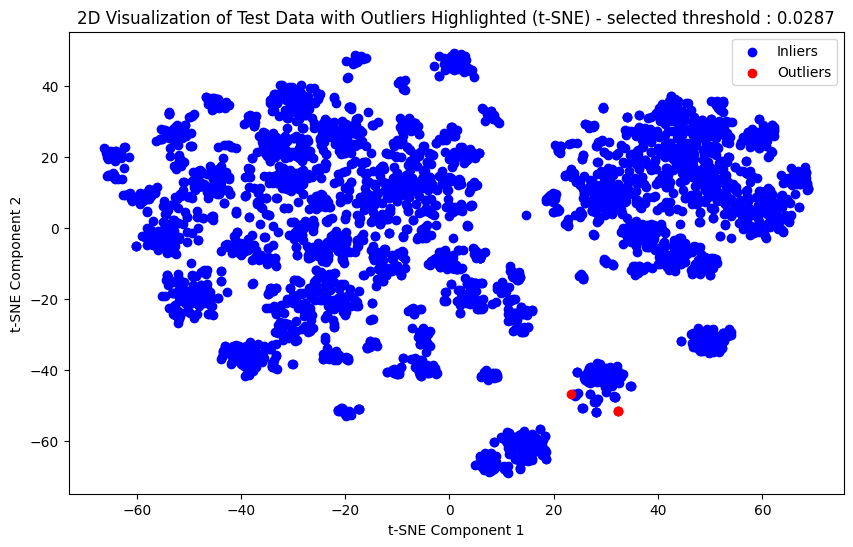

In [174]:
from sklearn.manifold import TSNE

# Step 2: Set a Threshold for Outliers
threshold = np.percentile(reconstruction_errors, 99.9)  # e.g., 95th percentile
outliers = reconstruction_errors > threshold

# Step 3: Reduce test_data to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
test_data_2d = tsne.fit_transform(test_data)

# Step 4: Plot the Data with Outliers Highlighted
plt.figure(figsize=(10, 6))
plt.scatter(test_data_2d[~outliers, 0], test_data_2d[~outliers, 1], color='blue', label='Inliers')
plt.scatter(test_data_2d[outliers, 0], test_data_2d[outliers, 1], color='red', label='Outliers')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D Visualization of Test Data with Outliers Highlighted (t-SNE)'+ f" - selected threshold : {float(round(threshold, 4))}")
plt.legend()
plt.show()

In [181]:
outliers_index = list(pd.Series(test_original_index)[outliers].values)
df_outliers = df.iloc[outliers_index]
df_outliers

,rating,review_title,text,images_by_user,parent_asin,helpful_vote,verified_purchase,main_category,product_title,average_rating,rating_number,features,images_of_product,store,year,day,hour,user_rating_count,user_rating_mean
23881,5.0,great product,got mine today gsd love treat thanks,0,B07HQGFM1W,1,1,2,pawstruck natural dog chew box large dog 50lbs,4.1,604.0,tasty natural chew dog love dog love safe heal...,4,11,2018,347,18,1,5.0
24500,3.0,received nice assortment product,received nice assortment product small dog pur...,0,B07HQGFM1W,1,1,2,pawstruck natural dog chew box large dog 50lbs,4.1,604.0,tasty natural chew dog love dog love safe heal...,4,11,2018,362,1,1,3.0
24475,5.0,pawstruck,im bit nut come treat give dog misty natural i...,0,B07HQGFM1W,28,1,2,pawstruck natural dog chew box large dog 50lbs,4.1,604.0,tasty natural chew dog love dog love safe heal...,4,11,2018,325,20,1,5.0
23318,1.0,expect mostly sour pack least 23rds sour,got 1 6 sour candy expect get sour candy choco...,2,B07GC3QLWS,20,1,2,candy club delicious premium candy subscriptio...,3.4,391.0,indulge delectable monthly candy subscription ...,7,6,2018,335,16,2,1.0


# Shift Scores

## Wasserstein distance

For starters, we will calculate the wasserstein distance between outliers and normal data in test set.

In [182]:
from scipy.stats import wasserstein_distance

# Example with Wasserstein Distance on each dimension
distances = [wasserstein_distance(test_data[~outliers, i], test_data[outliers, i]) for i in range(train_data.shape[1])]
avg_wasserstein_distance = sum(distances) / len(distances)
print(f"Average Wasserstein Distance: {avg_wasserstein_distance}")

Average Wasserstein Distance: 0.14499955127971625


And for comparison we will calculate the wasserstein distance between train set and test set.

In [183]:
from scipy.stats import wasserstein_distance

# Example with Wasserstein Distance on each dimension
distances = [wasserstein_distance(train_data[:, i], test_data[:, i]) for i in range(train_data.shape[1])]
avg_wasserstein_distance = sum(distances) / len(distances)
print(f"Average Wasserstein Distance: {avg_wasserstein_distance}")

Average Wasserstein Distance: 0.001866836387444126


This two distances affirms two major points :
- the distance between train and test is very low, so the train test split has been well adjusted
- the distance between outliers and non outliers is significant, which reflects to that the model did a good separation

In [186]:
train_data.shape

(17871, 211)

## PSI 

In [230]:
# Since our data is scaled between 0 and 1 we will need automatic binning for PSI score
num_bins = 10  
bins = np.linspace(0, 1, num_bins + 1)  

def calculate_psi(train, test, bins=bins):
    # Divide both sets into bins and calculate PSI
    psi = 0
    for bin in bins:
        train_perc = len(train[(train >= bin) & (train < bin+1)]) / len(train)
        test_perc = len(test[(test >= bin) & (test < bin+1)]) / len(test)
        if test_perc > 0:
            psi += (train_perc - test_perc) * np.log(train_perc / test_perc)
    return psi

# Apply PSI to each feature and plot
feature_drift_psi = {col: calculate_psi(test_data[~outliers, i], test_data[outliers, i]) for i,col in zip(range(test_data.shape[1]),df_data.columns)}
df_feature_drift_psi = pd.DataFrame.from_dict(data=feature_drift_psi,orient='index', columns=['psi_score']).reset_index().rename(columns={'index':'columns'})

/tmp/ipykernel_369165/1590014388.py:12: RuntimeWarning: divide by zero encountered in log
  psi += (train_perc - test_perc) * np.log(train_perc / test_perc)


In [231]:
df_feature_drift_psi

,columns,psi_score
0,rating,0.529823
1,images_by_user,1.220346
2,helpful_vote,0.000000
3,verified_purchase,0.001719
4,average_rating,0.281113
...,...,...
206,FE_45,0.143841
207,FE_46,inf
208,FE_47,inf
209,FE_48,inf


In [236]:
df_feature_drift_psi[df_feature_drift_psi.psi_score>1]

,columns,psi_score
1,images_by_user,1.220346
6,store,2.823728
7,year,1.837612
8,day,3.672494
10,user_rating_count,2.081200
...,...,...
205,FE_44,inf
207,FE_46,inf
208,FE_47,inf
209,FE_48,inf


<Axes: ylabel='Density'>

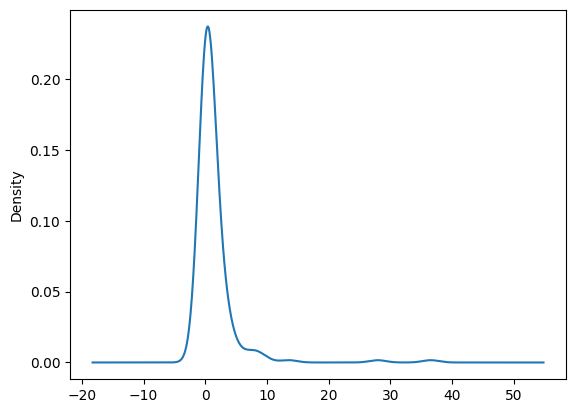

In [234]:
df_feature_drift_psi[df_feature_drift_psi.psi_score < np.inf].psi_score.plot(kind='density')

<Axes: ylabel='Density'>

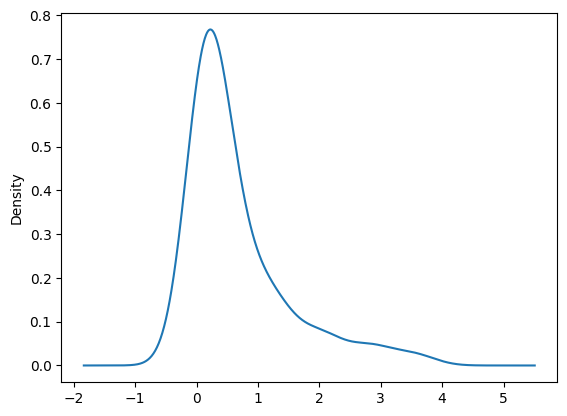

In [252]:
# Focus on features related to reviews
reviews_features = ['rating', 'images_by_user', 'helpful_vote', 'verified_purchase','store', 'year', 'day', 'hour', 'user_rating_count', 'RTE_0', 'RTE_1', 'RTE_2', 'RTE_3', 'RTE_4', 'RTE_5', 'RTE_6', 'RTE_7', 'RTE_8', 'RTE_9', 'RTE_10', 'RTE_11', 'RTE_12', 'RTE_13', 'RTE_14', 'RTE_15', 'RTE_16', 'RTE_17', 'RTE_18', 'RTE_19', 'RTE_20', 'RTE_21', 'RTE_22', 'RTE_23', 'RTE_24', 'RTE_25', 'RTE_26', 'RTE_27', 'RTE_28', 'RTE_29', 'RTE_30', 'RTE_31', 'RTE_32', 'RTE_33', 'RTE_34', 'RTE_35', 'RTE_36', 'RTE_37', 'RTE_38', 'RTE_39', 'RTE_40', 'RTE_41', 'RTE_42', 'RTE_43', 'RTE_44', 'RTE_45', 'RTE_46', 'RTE_47', 'RTE_48', 'RTE_49', 'TE_0', 'TE_1', 'TE_2', 'TE_3', 'TE_4', 'TE_5', 'TE_6', 'TE_7', 'TE_8', 'TE_9', 'TE_10', 'TE_11', 'TE_12', 'TE_13', 'TE_14', 'TE_15', 'TE_16', 'TE_17', 'TE_18', 'TE_19', 'TE_20', 'TE_21', 'TE_22', 'TE_23', 'TE_24', 'TE_25', 'TE_26', 'TE_27', 'TE_28', 'TE_29', 'TE_30', 'TE_31', 'TE_32', 'TE_33', 'TE_34', 'TE_35', 'TE_36', 'TE_37', 'TE_38', 'TE_39', 'TE_40', 'TE_41', 'TE_42', 'TE_43', 'TE_44', 'TE_45', 'TE_46', 'TE_47', 'TE_48', 'TE_49']
df_review_feature_drift_psi = df_feature_drift_psi[df_feature_drift_psi['columns'].isin(reviews_features)]
df_review_feature_drift_psi[df_review_feature_drift_psi.psi_score < np.inf].psi_score.plot(kind='density')

We don't as much drift as we have seen in the global, while these are the features that we want to find